In [ ]:
import os

def scale_input_data(scale_factor):
  file_bases = ['./input/summer-products-with-rating-and-performance_2020-08']
  for file_base in file_bases:
    import pandas as pd
    import shutil
    if scale_factor == 1.0:
      shutil.copyfile(file_base + '.csv', file_base + '.scaled.csv')
      continue
    df_to_scale = pd.read_csv(file_base + '.csv')
    new_num_rows = int(scale_factor * len(df_to_scale))
    if scale_factor <= 1.0:
      df_to_scale = df_to_scale.iloc[:new_num_rows]
    else:
      while len(df_to_scale) < new_num_rows:
        df_to_scale = pd.concat([df_to_scale, df_to_scale[:min(new_num_rows - len(df_to_scale), len(df_to_scale))]])
    df_to_scale.to_csv(file_base + '.scaled.csv', index=False)

if 'INPUT_SCALE_FACTOR' in os.environ:
  scale_input_data(float(os.environ['INPUT_SCALE_FACTOR']))

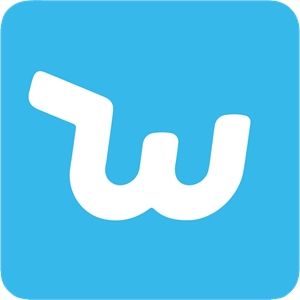

# Extracting the most useful data
*  the strcuture of the dataset have alot of columns and quiet small number of raws  I have to understand this data carefully so I will assess,clean this data , i will choose the most useful columns and i will ignore the remaining I want to extract the most usefull data to my model

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
exec(os.environ['IREWR_IMPORTS'])

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# FIRST-AUTHOR: remove path printing
# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

#  Reading my dataset to my notebook

In [2]:
df_products=pd.read_csv("./input/summer-products-with-rating-and-performance_2020-08.scaled.csv")
df_products.head()

,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,...,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month
0,2020 Summer Vintage Flamingo Print Pajamas Se...,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,EUR,100,0,3.76,54,26.0,...,568,4.128521,595097d6a26f6e070cb878d1,0,NaN,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,https://contestimg.wish.com/api/webimage/5e9ae...,5e9ae51d43d6a96e303acdb0,summer,2020-08
1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,EUR,20000,1,3.45,6135,2269.0,...,17752,3.899673,56458aa03a698c35c9050988,0,NaN,https://www.wish.com/c/58940d436a0d3d5da4e95a38,https://contestimg.wish.com/api/webimage/58940...,58940d436a0d3d5da4e95a38,summer,2020-08
2,2020 Nouvelle Arrivée Femmes Printemps et Été ...,2020 New Arrival Women Spring and Summer Beach...,8.00,43,EUR,100,0,3.57,14,5.0,...,295,3.989831,5d464a1ffdf7bc44ee933c65,0,NaN,https://www.wish.com/c/5ea10e2c617580260d55310a,https://contestimg.wish.com/api/webimage/5ea10...,5ea10e2c617580260d55310a,summer,2020-08
3,Hot Summer Cool T-shirt pour les femmes Mode T...,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,EUR,5000,1,4.03,579,295.0,...,23832,4.020435,58cfdefdacb37b556efdff7c,0,NaN,https://www.wish.com/c/5cedf17ad1d44c52c59e4aca,https://contestimg.wish.com/api/webimage/5cedf...,5cedf17ad1d44c52c59e4aca,summer,2020-08
4,Femmes Shorts d'été à lacets taille élastique ...,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3,EUR,100,1,3.10,20,6.0,...,14482,4.001588,5ab3b592c3911a095ad5dadb,0,NaN,https://www.wish.com/c/5ebf5819ebac372b070b0e70,https://contestimg.wish.com/api/webimage/5ebf5...,5ebf5819ebac372b070b0e70,summer,2020-08


# Starting my assessment process 
1. visual assessment 
2. programmatic assessment
# #  visual assessment
I have used microsoft excel to visual assessment process 
currency_buyer , inventory_total , shipping_is_express ,theme and crawl_month columns has only one value I don't think that is useful for my model
urgency_text ,avis positifs has alot of missing data 
merchant_info_subtitle not well structued column becasue some values have avis positifs but another havn't 
product_url and product_picture are links so I think we can't extract useful information for my analysis 

# # Programmatic assessment

In [3]:
df_products.columns

Index(['title', 'title_orig', 'price', 'retail_price', 'currency_buyer',
       'units_sold', 'uses_ad_boosts', 'rating', 'rating_count',
       'rating_five_count', 'rating_four_count', 'rating_three_count',
       'rating_two_count', 'rating_one_count', 'badges_count',
       'badge_local_product', 'badge_product_quality', 'badge_fast_shipping',
       'tags', 'product_color', 'product_variation_size_id',
       'product_variation_inventory', 'shipping_option_name',
       'shipping_option_price', 'shipping_is_express', 'countries_shipped_to',
       'inventory_total', 'has_urgency_banner', 'urgency_text',
       'origin_country', 'merchant_title', 'merchant_name',
       'merchant_info_subtitle', 'merchant_rating_count', 'merchant_rating',
       'merchant_id', 'merchant_has_profile_picture',
       'merchant_profile_picture', 'product_url', 'product_picture',
       'product_id', 'theme', 'crawl_month'],
      dtype='object')

In [4]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 43 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         1573 non-null   object 
 1   title_orig                    1573 non-null   object 
 2   price                         1573 non-null   float64
 3   retail_price                  1573 non-null   int64  
 4   currency_buyer                1573 non-null   object 
 5   units_sold                    1573 non-null   int64  
 6   uses_ad_boosts                1573 non-null   int64  
 7   rating                        1573 non-null   float64
 8   rating_count                  1573 non-null   int64  
 9   rating_five_count             1528 non-null   float64
 10  rating_four_count             1528 non-null   float64
 11  rating_three_count            1528 non-null   float64
 12  rating_two_count              1528 non-null   float64
 13  rat

1-retail_price is int data type 
2-

In [5]:
product_color=df_products['product_color'].value_counts()
print(product_color.to_string())

black                  302
white                  254
yellow                 105
blue                    99
pink                    99
red                     93
green                   90
grey                    71
purple                  53
armygreen               31
navyblue                28
winered                 28
orange                  27
multicolor              20
beige                   14
lightblue               12
khaki                   12
gray                    11
white & green           10
rosered                  8
skyblue                  8
brown                    7
coffee                   7
darkblue                 6
floral                   5
rose                     5
lightpink                4
navy                     4
leopard                  4
black & green            4
fluorescentgreen         4
lightgreen               3
White                    3
orange-red               3
black & white            3
camouflage               3
Black                    3
w

In [6]:
#for index,item in df_products['product_color'].items() :
   # item=str(item).lower()

In [7]:
df_products['product_color']=df_products['product_color'].str.lower()
print(df_products['product_color'].value_counts().to_string())

black                  305
white                  257
yellow                 105
pink                   101
blue                   100
red                     94
green                   90
grey                    71
purple                  53
armygreen               31
winered                 28
navyblue                28
orange                  27
multicolor              20
beige                   14
lightblue               12
khaki                   12
gray                    11
white & green           10
rosered                  8
skyblue                  8
brown                    7
coffee                   7
darkblue                 6
floral                   5
rose                     5
black & green            4
lightpink                4
navy                     4
leopard                  4
fluorescentgreen         4
camouflage               3
army green               3
lightgreen               3
orange-red               3
black & white            3
coralred                 2
l

In [8]:
df_products['product_color'].replace('grey','gray',inplace=True)

In [9]:
df_products['product_color']=df_products['product_color'].str.split('&')
print(df_products['product_color'])

0              [white]
1              [green]
2       [leopardprint]
3              [black]
4             [yellow]
             ...      
1568        [navyblue]
1569       [lightblue]
1570           [white]
1571           [white]
1572             [red]
Name: product_color, Length: 1573, dtype: object


In [10]:
df_products['product_color']=df_products['product_color'].str[0]

In [11]:
print(df_products['product_color'].value_counts().to_string())

black                 305
white                 257
yellow                105
pink                  101
blue                  100
red                    94
green                  90
gray                   82
purple                 53
armygreen              31
navyblue               28
winered                28
orange                 27
multicolor             20
beige                  14
white                  13
lightblue              12
khaki                  12
black                  12
rosered                 8
pink                    8
skyblue                 8
coffee                  7
brown                   7
darkblue                6
floral                  5
rose                    5
fluorescentgreen        4
leopard                 4
lightpink               4
navy                    4
orange-red              3
lightgreen              3
army green              3
camouflage              3
coralred                2
applegreen              2
lightred                2
lakeblue    

In [12]:
df_products['product_color']=df_products['product_color'].str.split(' ')
df_products['product_color']=df_products['product_color'].str[0]
print(df_products['product_color'].value_counts().to_string())

black                 317
white                 270
pink                  109
yellow                105
blue                  101
red                    95
green                  90
gray                   83
purple                 53
armygreen              31
navyblue               29
winered                29
orange                 28
multicolor             20
beige                  14
lightblue              12
khaki                  12
brown                   8
rosered                 8
skyblue                 8
coffee                  7
rose                    6
navy                    6
darkblue                6
floral                  5
lightpink               4
army                    4
fluorescentgreen        4
leopard                 4
camouflage              3
lightgreen              3
wine                    3
orange-red              3
lightred                2
coolblack               2
coralred                2
whitefloral             2
lakeblue                2
camel       

In [13]:
df_products['product_color']=df_products['product_color'].str.split('-')
df_products['product_color']=df_products['product_color'].str[0]
print(df_products['product_color'].value_counts().to_string())

black                 317
white                 270
pink                  109
yellow                105
blue                  101
red                    95
green                  90
gray                   83
purple                 53
orange                 31
armygreen              31
navyblue               29
winered                29
multicolor             20
beige                  14
lightblue              12
khaki                  12
skyblue                 8
rosered                 8
brown                   8
coffee                  7
rose                    6
navy                    6
darkblue                6
floral                  5
lightpink               4
army                    4
leopard                 4
fluorescentgreen        4
camouflage              3
lightgreen              3
wine                    3
lakeblue                2
camel                   2
coralred                2
lightred                2
applegreen              2
watermelonred           2
apricot     

In [14]:
df_products['product_color'].replace({'applegreen':'green','blackwhite':'black',
                                     'lightgreen':'green','lightblue':'blue','navyblue':'blue',
                                     'denimblue':'blue','prussianblue':'blue','lakeblue':'blue',
                                     'darkblue':'blue','skyblue':'blue','lightblue':'blue'
                                     ,'navyblue':'blue','armygreen':'green','darkgreen':'green',
                                     'applegreen':'green','lightgreen':'green','mintgreen':'green',
                                      'winered':'red','coralred':'red','lightred':'red',
                                     'watermelonred':'red','fluorescentgreen':'green',
                                     'rosered':'rose','rosegold':'rose','greysnakeskinprint':'gray',
                                     'lightgray':'gray','lightgrey':'gray','whitefloral':'white'
                                     ,'whitestripe':'white','lightpink':'pink','dustypink':'pink',
                                     'lightkhaki':'khaki','lightpurple':'purple','lightyellow':'yellow',
                                     'tan':'brown','coffee':'brown','offwhite':'white',
                                     'offblack':'black','coolblack':'black','leopardprint':
                                     'leopard','claret':'red','violet':'blue','apricot':'pink',
                                     'nude':'pink','gold':'brown','ivory':'beige','burgundy':'red',
                                     'navy':'blue','wine':'red','camel':'brown','khaki':'brown','light':'white'},inplace=True)

![](http://)I Will change colors like floral ,leopard , army ,camouflage , silver ,star , khaki , rainbow ,jasper to multicolor to reduce the values 

In [15]:
df_products['product_color'].replace({'floral':'multicolor','leopard':'multicolor',
                                     'army':'multicolor','camouflage':'multicolor',
                                     'silver':'multicolor','star':'multicolor',
                                     'khaki':'multicolor','rainbow':'multicolor',
                                     'jasper':'multicolor',} ,inplace=True)

In [16]:
df_products['currency_buyer'].value_counts()

EUR    1573
Name: currency_buyer, dtype: int64

In [17]:
print(df_products['product_color'].value_counts().to_string())

black         321
white         275
blue          167
red           136
green         133
pink          118
yellow        107
gray           86
purple         54
multicolor     43
orange         31
brown          31
beige          15
rose           15


there are 1573 value are the same and no more category so this column will be useless for me so i will drop it 

In [18]:
df_products.drop('currency_buyer',axis=1,inplace=True)

In [19]:
df_products['merchant_id'].value_counts()

558c2cdc89d53c4005ea2920    15
5acaf29d5ebcfd72403106a8    12
583138b06339b410ab9663ec     9
5533c83986ff95173dc017d0     8
564d8a9ac0f55a1276cd96f8     8
                            ..
58b81d56e3f66d59b36812ac     1
5e4f81dc968c88593150e98e     1
582ff94e0d44631042fe7c41     1
5aad329608a224392d805720     1
5a409cf87b584e7951b2e25f     1
Name: merchant_id, Length: 958, dtype: int64

From result above there are 958 merchant in this dataset 15 times is the max selling  

df_products

In [20]:
df_products[df_products.duplicated()]

,title,title_orig,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,...,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month
311,Women's Summer Fashion Spaghetti Strap Dress F...,Women's Summer Fashion Spaghetti Strap Dress F...,8.00,7,50,0,3.88,8,5.0,1.0,...,334,3.736527,5dda40561fead208515f98e2,0,NaN,https://www.wish.com/c/5ea91e4d29b81241e1d43b27,https://contestimg.wish.com/api/webimage/5ea91...,5ea91e4d29b81241e1d43b27,summer,2020-08
411,New Women Ladies Fashion Summer Skinny High Wa...,New Women Ladies Fashion Summer Skinny High Wa...,14.00,12,5000,1,4.06,643,365.0,109.0,...,80093,4.006692,583138b06339b410ab9663ec,0,NaN,https://www.wish.com/c/5c80e8a150c63d28c67b8f14,https://contestimg.wish.com/api/webimage/5c80e...,5c80e8a150c63d28c67b8f14,summer,2020-08
447,Womens Summer Fashion Lip Print 2pc Set Ladies...,Womens Summer Fashion Lip Print 2pc Set Ladies...,5.00,51,10,0,5.00,0,NaN,NaN,...,295,3.989831,5d464a1ffdf7bc44ee933c65,0,NaN,https://www.wish.com/c/5eb90ab5ad67f63678d15ed9,https://contestimg.wish.com/api/webimage/5eb90...,5eb90ab5ad67f63678d15ed9,summer,2020-08
505,Plus la taille des femmes de la mode lâche déc...,Plus Size Women's Fashion Loose Casual sleevel...,5.83,5,100,0,4.36,22,13.0,5.0,...,17471,3.952836,5aab3c8ea6bf7a704caec65c,0,NaN,https://www.wish.com/c/5e9932cab3eafb25c00ba79f,https://contestimg.wish.com/api/webimage/5e993...,5e9932cab3eafb25c00ba79f,summer,2020-08
571,Summer Women Fashion Fashion Robe courte sans ...,Summer Women Fashion Short Dress Sleeveless Wa...,8.00,51,100,0,4.29,31,19.0,5.0,...,5846,3.832535,5a792e56a71fbf471cf1fc99,0,NaN,https://www.wish.com/c/5d78eb19cc404c03393c83b5,https://contestimg.wish.com/api/webimage/5d78e...,5d78eb19cc404c03393c83b5,summer,2020-08
684,Femmes d'été Boho Maxi Polka Dot Robe Irréguli...,Summer Women Boho Maxi Polka Dot Dress Irregul...,6.00,6,100,1,3.67,27,9.0,8.0,...,4705,4.040595,580c7d0a8b67fa197454a2d1,0,NaN,https://www.wish.com/c/5e142dee04c3e579e89576a3,https://contestimg.wish.com/api/webimage/5e142...,5e142dee04c3e579e89576a3,summer,2020-08
689,Femmes d'été Mode Shorts de sport double couch...,Summer Women Fashion Double-Layer Sports Short...,3.76,7,50,0,3.50,8,4.0,1.0,...,3730,3.880429,58d8e8ebd929c652b9c04c05,0,NaN,https://www.wish.com/c/5ebe625c3cdb6c40b7b9231e,https://contestimg.wish.com/api/webimage/5ebe6...,5ebe625c3cdb6c40b7b9231e,summer,2020-08
698,Débardeur en coton sans manches pour femmes,Women's Summer Sleeveless Tank Cotton Vest Pri...,6.00,7,50,0,2.67,3,1.0,0.0,...,1374,4.058952,5a2fa9ce6ea4a770c66f5599,0,NaN,https://www.wish.com/c/5eb4f323b67a8d189a8f8380,https://contestimg.wish.com/api/webimage/5eb4f...,5eb4f323b67a8d189a8f8380,summer,2020-08
770,Nouvelle mode d'été femmes robe décontractée c...,New Fashion Summer Women Casual Dress Round Ne...,2.00,9,100,0,3.47,32,11.0,6.0,...,4856,4.167628,5710ac98b2d43a5925da8dd8,0,NaN,https://www.wish.com/c/5e940265ea3640c9ca0353aa,https://contestimg.wish.com/api/webimage/5e940...,5e940265ea3640c9ca0353aa,summer,2020-08
991,2020 Shorts classiques pour hommes d'été Panta...,2020 Summer Men's Classic Shorts Multi-pocket ...,7.00,17,10,0,5.00,2,2.0,0.0,...,46,3.608696,5e2ecb9deed5087a7ba2f5f7,0,NaN,https://www.wish.com/c/5eeef4c4066647a9388a8ac2,https://contestimg.wish.com/api/webimage/5eeef...,5eeef4c4066647a9388a8ac2,summer,2020-08


In [21]:
df_products.drop('merchant_title',axis=1,inplace=True)

In [22]:
df_products.drop('merchant_name',axis=1,inplace=True)

In [23]:
df_products['origin_country'].value_counts()

CN    1516
US      31
VE       5
SG       2
AT       1
GB       1
Name: origin_country, dtype: int64

In [24]:
df_products.drop('merchant_profile_picture',axis=1,inplace=True)

In [25]:
df_products['crawl_month'].value_counts()

2020-08    1573
Name: crawl_month, dtype: int64

In [26]:
df_products.drop('crawl_month',axis=1,inplace=True)

In [27]:
df_products['urgency_text'].value_counts()

Quantité limitée !                  472
Réduction sur les achats en gros      1
Name: urgency_text, dtype: int64

In [28]:
df_products['urgency_text'].isnull().sum()

1100

there are two reasones to drop this column </br>
1-nearby all the values are similar </br>
2-that column has 1100 values NaN </br>
so this won't be useful

In [29]:
df_products.drop('urgency_text',axis=1,inplace=True)

In [30]:
df_products.drop('merchant_info_subtitle',axis=1,inplace=True)

In [31]:
df_products.drop('product_picture',axis=1,inplace=True)

In [32]:
df_products.drop('product_url',axis=1,inplace=True)

In [33]:
df_products['theme'].value_counts()

summer    1573
Name: theme, dtype: int64

In [34]:
df_products.drop('theme',axis=1,inplace=True)

In [35]:
df_products.head()

,title,title_orig,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,...,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,origin_country,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,product_id
0,2020 Summer Vintage Flamingo Print Pajamas Se...,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,100,0,3.76,54,26.0,8.0,...,0,34,50,1.0,CN,568,4.128521,595097d6a26f6e070cb878d1,0,5e9ae51d43d6a96e303acdb0
1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,20000,1,3.45,6135,2269.0,1027.0,...,0,41,50,1.0,CN,17752,3.899673,56458aa03a698c35c9050988,0,58940d436a0d3d5da4e95a38
2,2020 Nouvelle Arrivée Femmes Printemps et Été ...,2020 New Arrival Women Spring and Summer Beach...,8.00,43,100,0,3.57,14,5.0,4.0,...,0,36,50,1.0,CN,295,3.989831,5d464a1ffdf7bc44ee933c65,0,5ea10e2c617580260d55310a
3,Hot Summer Cool T-shirt pour les femmes Mode T...,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,5000,1,4.03,579,295.0,119.0,...,0,41,50,NaN,CN,23832,4.020435,58cfdefdacb37b556efdff7c,0,5cedf17ad1d44c52c59e4aca
4,Femmes Shorts d'été à lacets taille élastique ...,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3,100,1,3.10,20,6.0,4.0,...,0,35,50,1.0,CN,14482,4.001588,5ab3b592c3911a095ad5dadb,0,5ebf5819ebac372b070b0e70


In [36]:
df_products.columns

Index(['title', 'title_orig', 'price', 'retail_price', 'units_sold',
       'uses_ad_boosts', 'rating', 'rating_count', 'rating_five_count',
       'rating_four_count', 'rating_three_count', 'rating_two_count',
       'rating_one_count', 'badges_count', 'badge_local_product',
       'badge_product_quality', 'badge_fast_shipping', 'tags', 'product_color',
       'product_variation_size_id', 'product_variation_inventory',
       'shipping_option_name', 'shipping_option_price', 'shipping_is_express',
       'countries_shipped_to', 'inventory_total', 'has_urgency_banner',
       'origin_country', 'merchant_rating_count', 'merchant_rating',
       'merchant_id', 'merchant_has_profile_picture', 'product_id'],
      dtype='object')

I will see what is null values in the remaining columns 

In [37]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         1573 non-null   object 
 1   title_orig                    1573 non-null   object 
 2   price                         1573 non-null   float64
 3   retail_price                  1573 non-null   int64  
 4   units_sold                    1573 non-null   int64  
 5   uses_ad_boosts                1573 non-null   int64  
 6   rating                        1573 non-null   float64
 7   rating_count                  1573 non-null   int64  
 8   rating_five_count             1528 non-null   float64
 9   rating_four_count             1528 non-null   float64
 10  rating_three_count            1528 non-null   float64
 11  rating_two_count              1528 non-null   float64
 12  rating_one_count              1528 non-null   float64
 13  bad

has_urgency_banner has alot of missing data so i will drop it 

In [38]:
df_products.drop('has_urgency_banner',axis=1,inplace=True)

In [39]:
df_products['origin_country'][df_products['origin_country']=="NaN"]

Series([], Name: origin_country, dtype: object)

In [40]:
df_products['origin_country'].value_counts()

CN    1516
US      31
VE       5
SG       2
AT       1
GB       1
Name: origin_country, dtype: int64

In [41]:
mode=df_products['origin_country'].mode()
print(mode)
df_products['origin_country']=df_products['origin_country'].replace(np.nan,"CN")

0    CN
Name: origin_country, dtype: object


In [42]:
df_products['origin_country'].isnull().sum()

0

In [43]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         1573 non-null   object 
 1   title_orig                    1573 non-null   object 
 2   price                         1573 non-null   float64
 3   retail_price                  1573 non-null   int64  
 4   units_sold                    1573 non-null   int64  
 5   uses_ad_boosts                1573 non-null   int64  
 6   rating                        1573 non-null   float64
 7   rating_count                  1573 non-null   int64  
 8   rating_five_count             1528 non-null   float64
 9   rating_four_count             1528 non-null   float64
 10  rating_three_count            1528 non-null   float64
 11  rating_two_count              1528 non-null   float64
 12  rating_one_count              1528 non-null   float64
 13  bad

In [44]:
mode=df_products['product_color'].mode()
print(mode)
df_products['product_color']=df_products['product_color'].replace(np.nan,"black")

0    black
Name: product_color, dtype: object


In [45]:
df_products['origin_country'].isnull().sum()

0

In [46]:
df_products['product_id'].value_counts()

5e16cb87e6dd7c03be24b28a    3
5e9932cab3eafb25c00ba79f    3
5e93d60ebc5446aedde50c50    3
5ea91e4d29b81241e1d43b27    3
5cde56ea6bbbd86b1cbab4a8    3
                           ..
53c8f05046188e57778ac77c    1
5a6f52aef718e05afa275acd    1
5da95c1665eaf90d411b3bd0    1
5763e16461221c639c5ec734    1
5e857321f53c3d2d8f25e7ed    1
Name: product_id, Length: 1341, dtype: int64

accutlly I have 1341 products so I want to know how many items sold for each product ?

In [47]:
averagefeatur=df_products.groupby(df_products['product_id']).mean()[['price','retail_price','merchant_rating',
                                                                 'rating']]
averagefeatur

/tmp/ipykernel_696984/2127797219.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  averagefeatur=df_products.groupby(df_products['product_id']).mean()[['price','retail_price','merchant_rating',


,price,retail_price,merchant_rating,rating
product_id,,,,
535530635aefb0555ba4351f,19.00,21.0,4.092914,4.09
53897eeeafddf70c91af1cda,5.00,33.0,4.036081,3.98
53c8f05046188e57778ac77c,12.00,81.0,4.127921,4.08
544b079d1280fa28eee9b380,5.77,48.0,4.067348,4.10
54ab85ff509baf3e966f7f2a,19.00,105.0,4.329949,4.40
...,...,...,...,...
5f03643cc00703c46d6745f0,12.00,11.0,4.500000,5.00
5f046ac0980447385a1a28e4,12.00,11.0,3.000000,1.00
5f095371d25f1d274c028031,5.00,5.0,4.122867,5.00


In [48]:
df_products.to_csv("df_products.csv")

we just cleaned our data and we want to build first model to know 

There some problems in the data we will rediscover this issues

In [49]:
df_products['diffrencebetprices']=df_products['retail_price']-df_products['price']

In [50]:
df_products['diffrencebetprices'].loc[df_products['diffrencebetprices']<=0]

0      -2.00
3       0.00
6      -1.00
7      -1.00
10     -0.79
        ... 
1559   -2.00
1564   -0.91
1567   -1.00
1571   -2.00
1572   -1.00
Name: diffrencebetprices, Length: 752, dtype: float64

there are 752 product bought in price which less than or equal the original price so I think these prices not correct I can't fed this values in my model

In [51]:
print(df_products['product_variation_size_id'].value_counts().to_string())

S                               641
XS                              356
M                               200
XXS                             100
L                                49
S.                               18
XL                               17
XXL                              15
XXXS                              6
s                                 5
Size S                            5
XS.                               5
4XL                               5
2XL                               4
SIZE XS                           4
M.                                4
Size-XS                           4
Size-S                            3
2pcs                              3
SizeL                             3
10 ml                             3
33                                3
34                                3
size S                            2
XXXXL                             2
Size M                            2
Size -XXS                         2
35                          

In [52]:
df_products['product_variation_size_id']=df_products['product_variation_size_id'].str.lower()

In [53]:
print(df_products['product_variation_size_id'].value_counts().to_string())

s                               646
xs                              356
m                               200
xxs                             100
l                                49
s.                               18
xl                               17
xxl                              15
size s                            8
xxxs                              6
4xl                               5
xs.                               5
2xl                               4
size xs                           4
m.                                4
size-xs                           4
sizel                             3
34                                3
10 ml                             3
33                                3
2pcs                              3
size-s                            3
size-xxs                          3
s pink                            2
1 pc.                             2
size -xxs                         2
s(bust 88cm)                      2
suit-s                      

In [54]:
df_products['product_variation_size_id'].replace({"s.":"s","size s":"s","size-s":"s","size s.":"s",
                                                "s(bust 88cm)":"s","suit-s":"s",
                                                "size--s":"s","size/s":"s","25-s":"s",
                                                "s(pink & black)":"s","us-s":"s",
                                                "pants-s":"s","s diameter 30cm":"s","s..":"s","s (waist58-62cm)":"s"
                                                , "s pink":"s","m.":"m","size m":"m","sizel":"l","32/l":"l"
                                                 ,"size-l":"l","x   l":"xl","xs.":"xs","size-xs":"xs","size xs":"xs"
                                                 ,"size-xxs":"xxs","size -xxs":"xxs","size xxs":"xxs"
                                                 ,"2xl":"xxl","xxxxxl":"5xl","size-5xl":"5xl","xxxxl":"4xl",
                                                 "xxxl":"3xl","size-4xl":"4xl","l.":"l",
                                                 "1 pc - xl":"xl","04-3xl":"3xl","size4xl":"4xl",
                                                  "us 6.5 (eu 37)":"m","us5.5-eu35":"s","26(waist 72cm 28inch)":
                                                  "3x","women size 36":"s","36":"s","women size 37":"m","eu 35":"s",
                                                  "3x":"3xl","eu39(us8)":"m","choose a size":"s",
                                                  "base & top & matte top coat":"s","4-5 years":"s",
                                                  "daughter 24m":"s","2":"s","5":"s",
                                                  "30 cm":"s","white":"s","round":"s","40 cm":"s","17":"l",
                                                  "60":"l","floating chair for kid":"s","au plug low quality":"s",
                                                  "baby float boat":"s","4":"xs","s/m(child)":"s","1pc":"s"
                                                  ,"3 layered anklet":"s","base coat":"s","20pcs-10pairs":"s",
                                                  "pack of 1":"s","100 x 100cm(39.3 x 39.3inch)":"s","b":"s",
                                                  "first  generation":"s","3x":"3xl","100 cm":"s","2pcs":"s",
                                                  "5pairs":"s","10pcs":"s","20pcs":"s","100pcs":"s",
                                                  "1m by 3m":"s","h01":"s","80 x 200 cm":"s","1":"xxxs",
                                                  "33":"xs","34":"xs","29":"4xl","25":"xxl","35":"s","1 pc.":"s",
                                                  "one size":"s","10 ml":"s"
                                                 },inplace=True)

In [55]:
# FIRST-AUTHOR: remove plotting
# import matplotlib.pyplot as plt
# fig, ax = plt.subplots()
x=df_products['product_variation_size_id'].value_counts().index
y=df_products['product_variation_size_id'].value_counts()
# FIRST-AUTHOR: remove plotting
# ax.bar(x, y, align='center')
# ax.set_xticks(x)
# ax.set_xlabel('Size')
# ax.set_title('size counts')
# plt.show()

we can see that in the graph above small sizes between l and xxs have the large values 

In [56]:
df_products.to_csv("df_products.csv")

In [57]:
df_products['shipping_option_name'].value_counts()

Livraison standard         1508
Standard Shipping            21
Envio Padrão                  9
Expediere Standard            6
Envío normal                  5
الشحن القياسي                 4
Standardversand               3
Standardowa wysyłka           3
Livraison Express             3
Стандартная доставка          3
Standart Gönderi              2
การส่งสินค้ามาตรฐาน           2
Spedizione standard           2
ការដឹកជញ្ជូនតាមស្តង់ដារ       1
Ekspresowa wysyłka            1
Name: shipping_option_name, dtype: int64

In [58]:
standardshippinglist=["Livraison standard","Envio Padrão","Expediere Standard","Envío normal",
                     "الشحن القياسي","Standardversand","Standardowa wysyłka","Стандартная доставка",
                     "Standart Gönderi","Spedizione standard","การส่งสินค้ามาตรฐาน","ការដឹកជញ្ជូនតាមស្តង់ដារ"]

In [59]:
df_products.loc[df_products['shipping_option_name'] == "Livraison standard", "buymentlang"] = "French"

In [60]:
df_products.loc[df_products['shipping_option_name'] == "الشحن القياسي", "buymentlang"] = "Arabic"

In [61]:
df_products.loc[df_products['shipping_option_name'] == "Standard Shipping", "buymentlang"] = "English"

In [62]:
df_products.loc[df_products['shipping_option_name'] == "Envio Padrão", "buymentlang"] = "Portuguese"

In [63]:
df_products.loc[df_products['shipping_option_name'] == "Expediere Standard", "buymentlang"] = "Romanian"

In [64]:
df_products.loc[df_products['shipping_option_name'] == "Envío normal", "buymentlang"] = "Spanish"

In [65]:
df_products.loc[df_products['shipping_option_name'] == "Standardversand", "buymentlang"] = "German"

In [66]:
df_products.loc[df_products['shipping_option_name'] == "Livraison Express", "buymentlang"] = "French"

In [67]:
df_products.loc[df_products['shipping_option_name'] == "Standardowa wysyłka", "buymentlang"] = "Polish"

In [68]:
df_products.loc[df_products['shipping_option_name'] == "Стандартная доставка", "buymentlang"] = "Russian"

In [69]:
df_products.loc[df_products['shipping_option_name'] == "Standart Gönderi", "buymentlang"] = "Turkish"

In [70]:
df_products.loc[df_products['shipping_option_name'] == "Spedizione standard", "buymentlang"] = "Italian"

In [71]:
df_products.loc[df_products['shipping_option_name'] == "การส่งสินค้ามาตรฐาน", "buymentlang"] = "Thailand"

In [72]:
df_products.loc[df_products['shipping_option_name'] == "ការដឹកជញ្ជូនតាមស្តង់ដារ", "buymentlang"] = "Khmer"

In [73]:
df_products.loc[df_products['shipping_option_name'] == "Ekspresowa wysyłka", "buymentlang"] = "Polish"

In [74]:
df_products['buymentlang'].value_counts()

French        1511
English         21
Portuguese       9
Romanian         6
Spanish          5
Polish           4
Arabic           4
German           3
Russian          3
Turkish          2
Thailand         2
Italian          2
Khmer            1
Name: buymentlang, dtype: int64

In [75]:
df_products['buymentlang'].isnull().sum()

0

In [76]:
#standardshippinglist
df_products['shipping_option_name'].replace(standardshippinglist,"Standard Shipping",inplace=True)

In [77]:
df_products['shipping_option_name'].value_counts()

Standard Shipping     1569
Livraison Express        3
Ekspresowa wysyłka       1
Name: shipping_option_name, dtype: int64

In [78]:
Expresslist=["Livraison Express","Ekspresowa wysyłka"]

In [79]:
df_products['shipping_option_name'].replace(Expresslist,"Express Shipping",inplace=True)

In [80]:
df_products['shipping_option_price'].describe()

count    1573.000000
mean        2.345200
std         1.024371
min         1.000000
25%         2.000000
50%         2.000000
75%         3.000000
max        12.000000
Name: shipping_option_price, dtype: float64

In [81]:
# FIRST-AUTHOR: remove plotting
# fig, ax = plt.subplots()
x=df_products['shipping_option_price'].value_counts().index
y=df_products['shipping_option_price'].value_counts()
# FIRST-AUTHOR: remove plotting
# ax.bar(x, y, align='center')
# ax.set_xticks(x)
# ax.set_xlabel('price shipping')
# ax.set_title('price shipping counts')
# plt.show()

In [82]:
df_products.loc[df_products['shipping_option_price']==12]['shipping_option_name']

758    Express Shipping
Name: shipping_option_name, dtype: object

In [83]:
df_products.loc[df_products['shipping_option_price']==7]['shipping_option_name']

661      Express Shipping
985     Standard Shipping
1061     Express Shipping
1200    Standard Shipping
1531    Standard Shipping
Name: shipping_option_name, dtype: object

In [84]:
df_products['countries_shipped_to'].value_counts()[:20]

/tmp/ipykernel_696984/1572931023.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  df_products['countries_shipped_to'].value_counts()[:20]


41    171
43    170
40    106
38     76
36     64
35     61
42     57
39     43
25     39
37     38
33     35
20     34
45     34
23     34
31     34
27     31
26     31
48     29
44     25
32     25
Name: countries_shipped_to, dtype: int64

In [85]:
# FIRST-AUTHOR: remove plotting
# import seaborn as sns 
# sns.countplot(df_products['countries_shipped_to'].value_counts()[:20])
_ = df_products['countries_shipped_to'].value_counts()[:20]

/tmp/ipykernel_696984/2145427192.py:4: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  _ = df_products['countries_shipped_to'].value_counts()[:20]


In [86]:
df_products["badge_local_product"].value_counts()

0    1544
1      29
Name: badge_local_product, dtype: int64

In [87]:
df_products["badge_product_quality"].value_counts()

0    1456
1     117
Name: badge_product_quality, dtype: int64

In [88]:
df_products["badge_fast_shipping"].value_counts()

0    1553
1      20
Name: badge_fast_shipping, dtype: int64

In [89]:
df_products["inventory_total"].value_counts()

50    1563
2        2
40       1
36       1
1        1
30       1
9        1
24       1
37       1
38       1
Name: inventory_total, dtype: int64

In [90]:
df_products.to_csv("df_products.csv")

In [91]:
df_products=pd.get_dummies(df_products,columns=['product_color','shipping_option_name','origin_country','buymentlang'])

In [92]:
df_products.to_csv("df_products.csv")
print(x)

Int64Index([2, 3, 1, 4, 5, 6, 7, 12], dtype='int64')


In [93]:
# FIRST-AUTHOR: remove plotting
# from wordcloud import WordCloud
text=list(df_products['title'])
# FIRST-AUTHOR: remove plotting
# textcol=''
# for a in text :
#     textcol=textcol+a
# wordcloudmodel=WordCloud().generate(textcol)
# plt.imshow(wordcloudmodel,interpolation='bilinear')
# #plt.axis("on")
# plt.show()

In [94]:
text=list(df_products['title'])
# FIRST-AUTHOR: remove plotting
# textcol=''
# for a in text :
#     textcol=textcol+a
# wordcloudmodel=WordCloud().generate(textcol)
# plt.imshow(wordcloudmodel,interpolation='bilinear')
# plt.show()

In [95]:
df_products['product_variation_size_id'].value_counts()

s       739
xs      376
m       209
xxs     107
l        57
xxl      21
xl       19
4xl      12
xxxs      8
5xl       5
3xl       4
3x        1
6xl       1
Name: product_variation_size_id, dtype: int64

In [96]:
#from sklearn import preprocessing 
#le =preprocessing.LabelEncoder()
#le.fit_transform(df_products['product_variation_size_id'].astype(str))
df_products=pd.get_dummies(df_products,columns=['product_variation_size_id'])

In [97]:
df_products['rating']=df_products['rating'].apply(round)

In [98]:
# FIRST-AUTHOR: remove plotting
# sns.barplot(df_products['rating'].value_counts().index,df_products['rating'].value_counts())
_ = df_products['rating'].value_counts().index,df_products['rating'].value_counts()

In [99]:
df_products['merchant_rating']=df_products['merchant_rating'].apply(round)

In [100]:
# FIRST-AUTHOR: remove plotting
# sns.barplot(df_products['merchant_rating'].value_counts().index ,df_products['merchant_rating'].value_counts())
_ = df_products['merchant_rating'].value_counts().index ,df_products['merchant_rating'].value_counts()

In [101]:
df_products['product_variation_inventory'].value_counts()

50    907
1     152
2      81
5      74
3      52
10     40
4      25
9      22
7      18
6      18
20     16
15     13
17     11
18     10
49      9
13      8
25      7
19      7
29      7
46      6
30      6
8       6
44      6
11      6
14      5
12      5
43      4
36      4
34      4
35      4
41      4
48      4
47      4
27      3
45      3
39      2
23      2
31      2
26      2
28      2
40      2
38      2
37      2
21      2
16      1
22      1
33      1
24      1
Name: product_variation_inventory, dtype: int64

In [102]:
df_products['inventory_total'].value_counts()

50    1563
2        2
40       1
36       1
1        1
30       1
9        1
24       1
37       1
38       1
Name: inventory_total, dtype: int64

In [103]:
df_products['units_sold'].value_counts()

100       509
1000      405
5000      217
10000     177
20000     103
50         76
10         49
50000      17
100000      6
8           4
1           3
7           2
2           2
3           2
6           1
Name: units_sold, dtype: int64

In [104]:
dropval=df_products.loc[df_products['units_sold']>60000]

In [105]:
dropval.shape

(6, 77)

In [106]:
df_products=df_products.loc[df_products['units_sold']<=60000]

In [107]:
#df_products.drop(df_products[df_products['units_sold']>60000].index,axis=0,inplace=True)#

In [108]:
#print(,)

In [109]:
df_products.columns

Index(['title', 'title_orig', 'price', 'retail_price', 'units_sold',
       'uses_ad_boosts', 'rating', 'rating_count', 'rating_five_count',
       'rating_four_count', 'rating_three_count', 'rating_two_count',
       'rating_one_count', 'badges_count', 'badge_local_product',
       'badge_product_quality', 'badge_fast_shipping', 'tags',
       'product_variation_inventory', 'shipping_option_price',
       'shipping_is_express', 'countries_shipped_to', 'inventory_total',
       'merchant_rating_count', 'merchant_rating', 'merchant_id',
       'merchant_has_profile_picture', 'product_id', 'diffrencebetprices',
       'product_color_beige', 'product_color_black', 'product_color_blue',
       'product_color_brown', 'product_color_gray', 'product_color_green',
       'product_color_multicolor', 'product_color_orange',
       'product_color_pink', 'product_color_purple', 'product_color_red',
       'product_color_rose', 'product_color_white', 'product_color_yellow',
       'shipping_option_

In [110]:
X=[ 'price','uses_ad_boosts', 'rating', 'badges_count', 'badge_local_product','badge_product_quality',
   'badge_fast_shipping', 'shipping_option_price',
       'shipping_is_express', 'countries_shipped_to','merchant_rating',
       'merchant_has_profile_picture',
       'product_color_beige', 'product_color_black', 'product_color_blue',
       'product_color_brown', 'product_color_gray', 'product_color_green',
       'product_color_multicolor', 'product_color_orange',
       'product_color_pink', 'product_color_purple', 'product_color_red',
       'product_color_rose', 'product_color_white', 'product_color_yellow',
       'shipping_option_name_Express Shipping',
       'shipping_option_name_Standard Shipping', 'origin_country_AT',
       'origin_country_CN', 'origin_country_GB', 'origin_country_SG',
       'origin_country_US', 'origin_country_VE', 'buymentlang_Arabic',
       'buymentlang_English', 'buymentlang_French', 'buymentlang_German',
       'buymentlang_Italian', 'buymentlang_Khmer', 'buymentlang_Polish',
       'buymentlang_Portuguese', 'buymentlang_Romanian', 'buymentlang_Russian',
       'buymentlang_Spanish', 'buymentlang_Thailand', 'buymentlang_Turkish',
       'product_variation_size_id_3x', 'product_variation_size_id_3xl',
       'product_variation_size_id_4xl', 'product_variation_size_id_5xl',
       'product_variation_size_id_6xl', 'product_variation_size_id_l',
       'product_variation_size_id_m', 'product_variation_size_id_s',
       'product_variation_size_id_xl', 'product_variation_size_id_xs',
       'product_variation_size_id_xxl', 'product_variation_size_id_xxs',
       'product_variation_size_id_xxxs'
       ]
# FIRST-AUTHOR: make notebook run with input scaling
_idx = set(df_products.index)
X = [x for x in X if x in _idx]
X=df_products[X]
Y=df_products['units_sold']

In [111]:
#X['product_variation_size_id']

In [112]:
X.shape

(1567, 60)

In [113]:
Y.shape

(1567,)

In [114]:
X.to_csv("X.csv")

In [115]:
# FIRST-AUTHOR: remove ML code
# from sklearn.linear_model import LinearRegression 
# from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import normalize
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_absolute_error
# from sklearn.metrics import r2_score
# scaler = StandardScaler()
# lin = LinearRegression()

In [116]:
# FIRST-AUTHOR: remove ML code
# def modelfit(X,Y,scaler,modelalgorithm,train_test_split):
#     #scaler.fit_transform(X,Y)
#     normalize(X, norm='l2', axis=1, copy=True, return_norm=False)
#     scaler.fit_transform(X,Y)
#     #scaler.fit_transform()
#     X_train, X_test, y_train, y_test=train_test_split(X,Y,test_size=.2,random_state=42)
#     modelalgorithm.fit(X_train,y_train)
#     prediction =modelalgorithm.predict(X_test)
#     #print(mean_absolute_error(y_test,prediction))
#     return r2_score(y_test,prediction)

In [117]:
# FIRST-AUTHOR: remove ML code
# modelfit(X,Y,scaler,lin,train_test_split)

In [118]:
#accuracy=[]
#for i in range(X.shape[1]):
#    X_model=X.iloc[:,i:-1]
 ##   print("this model use all data without first",i,"columns")
  #  ac=modelfit(X_model,Y,scaler,lin,train_test_split)
  #  accuracy.append(ac)

In [119]:
# FIRST-AUTHOR: remove ML code
# accuracy=[]
# Start=[]
# End=[]
# maxac=modelfit(X.iloc[:,0:1],Y,scaler,lin,train_test_split)
# index_i=0
# index_j=0
for i in range(1,X.shape[1]):
    for j in range(1,X.shape[1]):
        if (i>j):
            X_model=X.iloc[:,j:i]
# FIRST-AUTHOR: remove ML code
#             print("this model use data start from",j,"column to",i ,"column")
#             try :
#                 ac=modelfit(X_model,Y,scaler,lin,train_test_split)
#                 accuracy.append(ac)
#                 Start.append(j)
#                 End.append(i)
#                 if ac>=maxac:
#                     maxac=ac
#                     index_i=i
#                     index_j=j
#                 print(ac)
#             except ValueError :
#                 print("error")
            

In [120]:
# FIRST-AUTHOR: remove plotting
# from mpl_toolkits.mplot3d import Axes3D
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.plot(Start,End,accuracy)
# plt.xlabel("x")
# plt.ylabel("y")
# plt.show()

In [121]:
# FIRST-AUTHOR: remove ML code
# index_i

In [122]:
# FIRST-AUTHOR: remove ML code
# index_j

In [123]:
# FIRST-AUTHOR: remove ML code
# max(accuracy)

In [124]:
# FIRST-AUTHOR: remove ML code
# min(accuracy)

In [125]:
X_predict=X.iloc[:,49:59]
y_result=Y.iloc[:]
#print(X.iloc[25,7:12])
# FIRST-AUTHOR: remove ML code
# scaler.fit_transform(X_predict,Y)
# X_train, X_test, y_train, y_test=train_test_split(X_predict,Y,test_size=.2,random_state=42)
# lin.fit(X_train,y_train)
# prediction =lin.predict(X.iloc[:,49:59])
# #print(mean_absolute_error(y_test,prediction))
# print(prediction,y_result)

In [126]:
# FIRST-AUTHOR: remove plotting
# plt.plot(prediction)
# plt.show()
# plt.plot(y_result)
# plt.show()

In [127]:
# FIRST-AUTHOR: remove ML code
# prediction.mean()

In [128]:
y_result.mean()

3972.721761327377

In [129]:
# FIRST-AUTHOR: remove ML code
# col=[]
# accuracy=[]
for j in range(1,X.shape[1]):
    X_model=X.iloc[:,j:j+1]
# FIRST-AUTHOR: remove ML code
#     print("this model use data start from",j,"column to")
#     ac=modelfit(X_model,Y,scaler,lin,train_test_split)
#     print(ac)
#     accuracy.append(ac)
#     col.append(j)

In [130]:
# FIRST-AUTHOR: remove plotting
# plt.plot(col,accuracy)
# plt.show()